*Kumar Kaustubh (IIT-Dh)*

**Problem Statement:**

The goal of this implementation is to develop a customer segmentation solution using K-means clustering algorithm. The objective is to analyze a given dataset of customer information and identify distinct customer segments based on their similarities in terms of gender, age, annual income and purchasing score. By effectively segmenting customers, businesses can gain valuable insights into their target audience, optimize marketing strategies, personalize offerings, and improve overall customer satisfaction and retention. The project aims to implement and evaluate the K-means clustering algorithm to provide actionable segmentation results for the business.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**Loading and Analysing the Data**

In [2]:
# Loading the csv data into a dataframe

customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [7]:
# Printing the first five rows of the dataset
# A higher spending score refers to frequent purchases
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
customer_data.shape # The dataset has 200 rows and 5 columns

(200, 5)

In [13]:
customer_data.info() # Getting information about the dataset and checking if there are any null values or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
customer_data.isnull().sum() # We can see there are no missing data here

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
# Removing customer ID, Gender and Age as they are not very relevant in clustering the customers
X = customer_data.iloc[:, [3,4]].values
# print(X) # fist entry in each list is Annual Income and Second one is Spending Scores

**Choosing Number of Clusters Using WCSS (Within Clusters Sum of Squares)**

$$WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - c_i\|^2$$


In k-means clustering, the objective is to find the values for the centroids c_i that minimize the WCSS. The algorithm achieves this by iteratively assigning data points to the closest centroid and recalculating the centroids based on the newly formed clusters. The final result is a set of centroids that minimizes the total sum of squared distances within each cluster.

In [23]:
# Checking for different WCSS values for different number of clusters using a for loop
wcss =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init = 10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS Values')

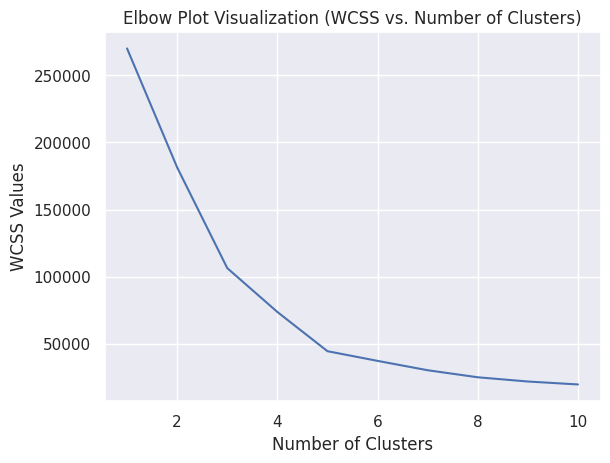

In [28]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title("Elbow Plot Visualization (WCSS vs. Number of Clusters)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Values")

In [29]:
# From the elbow graph above, we can see there is no significat change in the WCSS Value and hence we will choose 5 as number of cluster

**Training the Model**

In [31]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
Y = kmeans.fit_predict(X) # Predicting a cluster number
print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Plotting the Data and Visualizing All the Clusters**

Text(0, 0.5, 'Spending Scores')

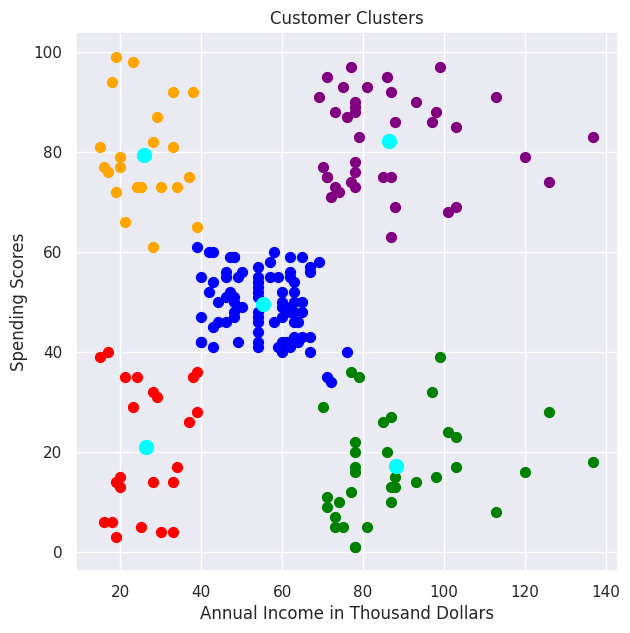

In [43]:
plt.figure(figsize =(7,7))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 50, c = 'blue', label = "cluster_1")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 50, c = 'green', label = "cluster_2")
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 50, c = 'red', label = "cluster_3")
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 50, c = 'orange', label = "cluster_4")
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s = 50, c = 'purple', label = "cluster_5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s =100, c = "cyan", label = "Centroid")
plt.title("Customer Clusters")
plt.xlabel("Annual Income in Thousand Dollars")
plt.ylabel("Spending Scores")